In [1]:
import pandas as pd

# Load the dataset
data = pd.read_parquet('yellow_tripdata_2024-04.parquet')

# Display the first few rows
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-04-01 00:02:40,2024-04-01 00:30:42,0.0,5.20,1.0,N,161,7,1,29.6,3.5,0.5,8.65,0.0,1.0,43.25,2.5,0.0
1,2,2024-04-01 00:41:12,2024-04-01 00:55:29,1.0,5.60,1.0,N,264,264,1,25.4,1.0,0.5,10.00,0.0,1.0,37.90,0.0,0.0
2,2,2024-04-01 00:48:42,2024-04-01 01:05:30,1.0,3.55,1.0,N,186,236,1,20.5,1.0,0.5,5.10,0.0,1.0,30.60,2.5,0.0
3,2,2024-04-01 00:56:02,2024-04-01 01:05:09,1.0,1.06,1.0,N,137,164,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0
4,1,2024-04-01 00:08:32,2024-04-01 00:10:24,1.0,0.70,1.0,N,236,263,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0


# Data Cleaning and Preprocessing

In [2]:
import numpy as np

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Convert columns to appropriate data types
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Inspect the data types
print(data.dtypes)

# Filter out any rides with zero or negative duration or distance
data = data[(data['trip_distance'] > 0) & ((data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.seconds > 0)]

print(data.shape)

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          408576
trip_distance                 0
RatecodeID               408576
store_and_fwd_flag       408576
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     408576
Airport_fee              408576
dtype: int64
VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type       

In [3]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-04-01 00:02:40,2024-04-01 00:30:42,0.0,5.20,1.0,N,161,7,1,29.6,3.5,0.5,8.65,0.0,1.0,43.25,2.5,0.0
1,2,2024-04-01 00:41:12,2024-04-01 00:55:29,1.0,5.60,1.0,N,264,264,1,25.4,1.0,0.5,10.00,0.0,1.0,37.90,0.0,0.0
2,2,2024-04-01 00:48:42,2024-04-01 01:05:30,1.0,3.55,1.0,N,186,236,1,20.5,1.0,0.5,5.10,0.0,1.0,30.60,2.5,0.0
3,2,2024-04-01 00:56:02,2024-04-01 01:05:09,1.0,1.06,1.0,N,137,164,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0
4,1,2024-04-01 00:08:32,2024-04-01 00:10:24,1.0,0.70,1.0,N,236,263,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0


# Exploratory Data Analysis (EDA)
We'll analyze the data to find patterns and insights:

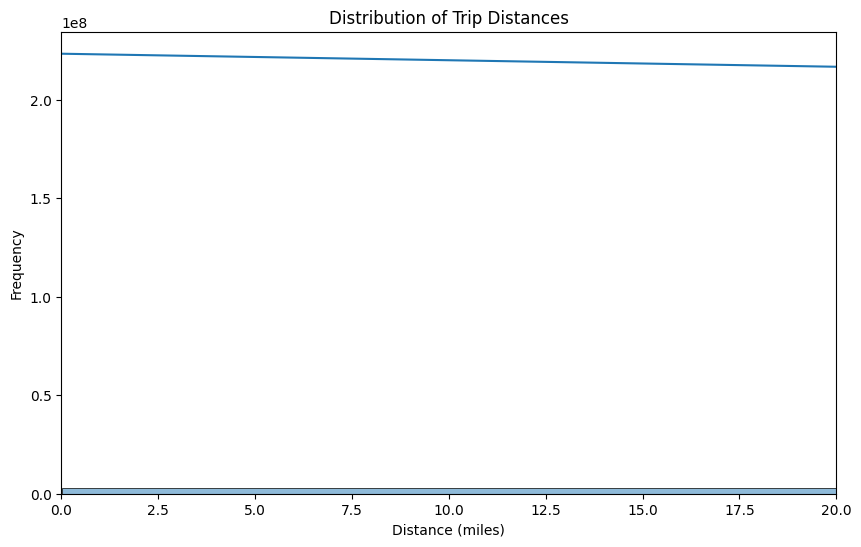

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(data['trip_distance'], bins=100, kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0, 20)
plt.show()

# Data Visualization
Visualizing patterns such as the busiest times for taxi rides and the relationship between trip distance and fare amount:

In [5]:
print(data.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3264\1893869086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count', data=data, palette='pastel')


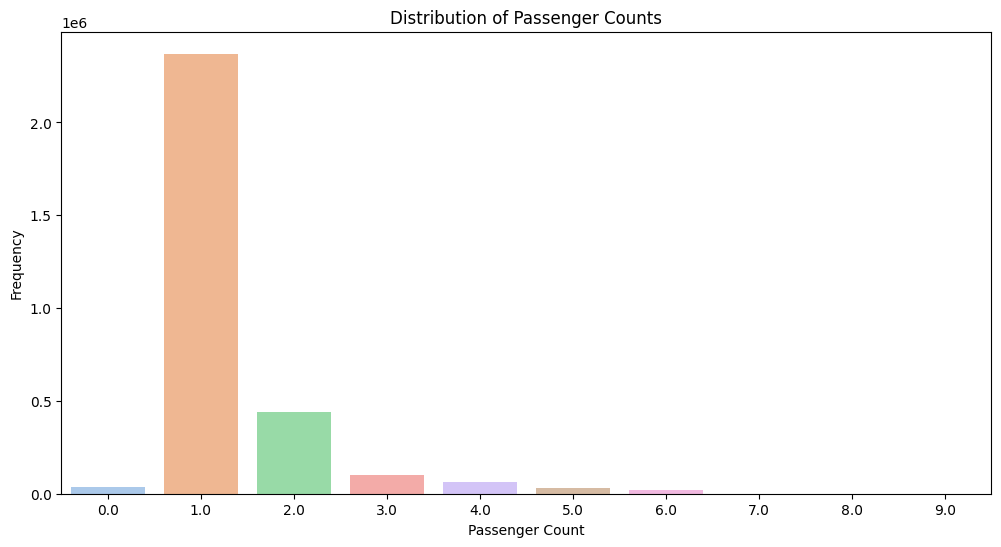

In [6]:
# Display of the distribution of Passenger Counts
plt.figure(figsize=(12, 6))
sns.countplot(x='passenger_count', data=data, palette='pastel')
plt.title('Distribution of Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3264\3994214275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=data, palette='deep')


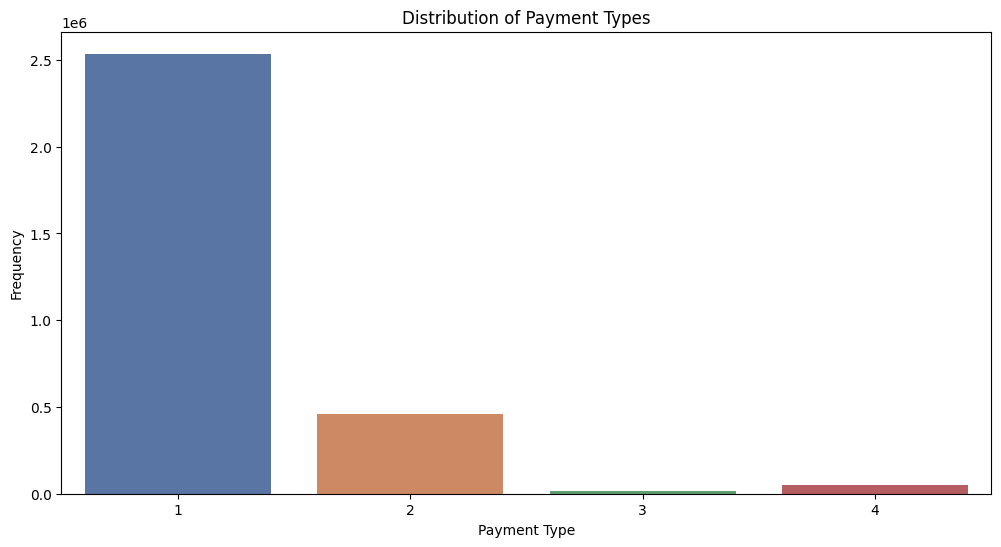

In [7]:
# Display of the distribution of payment types.
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_type', data=data, palette='deep')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()

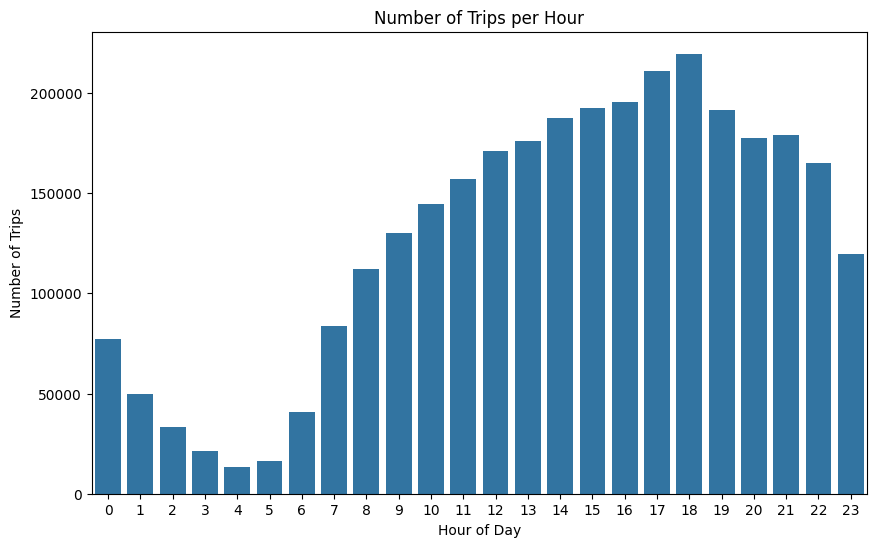

In [8]:
# Number of trips per hour
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
trips_per_hour = data.groupby('pickup_hour').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values)
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

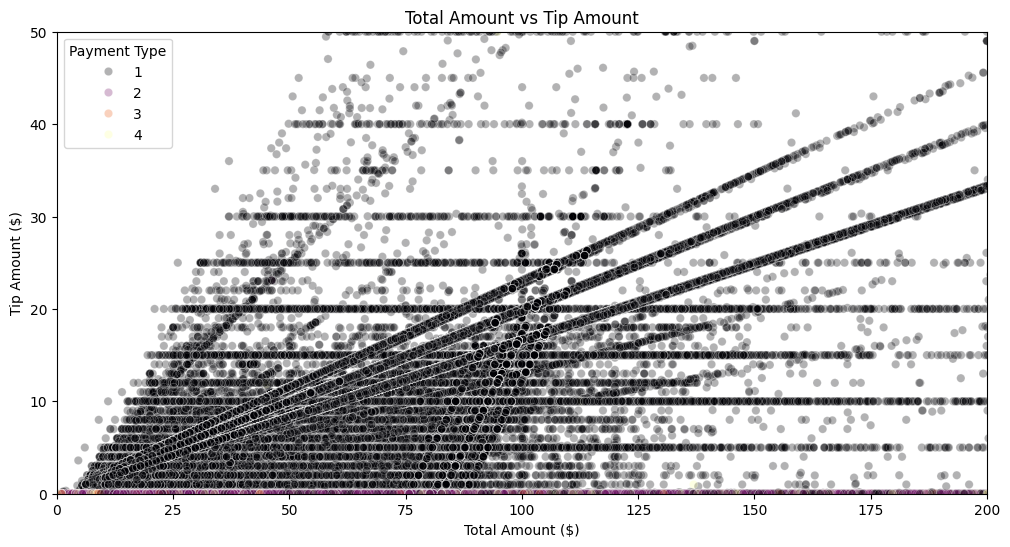

In [9]:
# A scatter plot shows the relationship between the total fare amount and the tip amount, 
# with different payment types highlighted.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_amount', y='tip_amount', data=data, alpha=0.3, hue='payment_type', palette='inferno')
plt.title('Total Amount vs Tip Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Tip Amount ($)')
plt.xlim(0, 200)
plt.ylim(0, 50)
plt.legend(title='Payment Type')
plt.show()

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


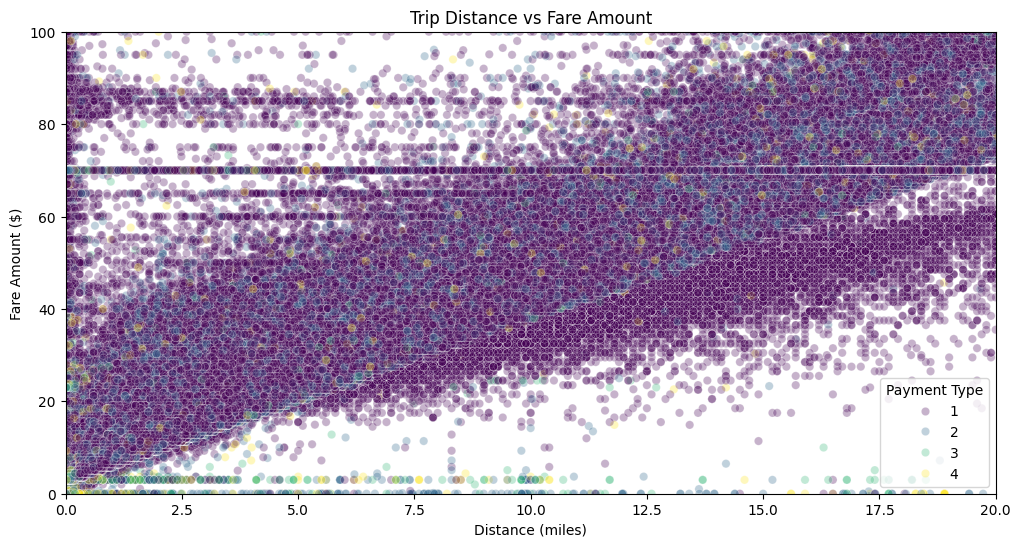

In [10]:
# Trip Distance vs. Fare Amount: A scatter plot reveals the relationship between trip 
# distance and fare amount, with different payment types highlighted.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=data, alpha=0.3, hue='payment_type', palette='viridis')
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.legend(title='Payment Type')
plt.show()

# PySpark

In [11]:
from pyspark.sql.functions import unix_timestamp
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize Spark session
spark = SparkSession.builder.appName('NYC Taxi Data Analysis').getOrCreate()

# Load the dataset into a Spark DataFrame
df = spark.read.parquet('yellow_tripdata_2024-04.parquet', header=True, inferSchema=True)

In [12]:
# Create a new column for the trip duration in minutes
df = df.withColumn('trip_duration', 
                   (unix_timestamp('tpep_dropoff_datetime') - unix_timestamp('tpep_pickup_datetime')) / 60)

In [13]:
# Take a sample of the data (e.g., 10%)
sample_df = df.sample(fraction=0.1, seed=74)

# Convert the sample Spark DataFrame to a Pandas DataFrame
pandas_df = sample_df.toPandas()

In [14]:
# Perform basic statistics to understand the data
df.describe(['trip_distance', 'fare_amount', 'trip_duration']).show()

+-------+-----------------+-----------------+-------------------+
|summary|    trip_distance|      fare_amount|      trip_duration|
+-------+-----------------+-----------------+-------------------+
|  count|          3514289|          3514289|            3514289|
|   mean| 5.28385057973311|18.97121628016352| 17.044871006150185|
| stddev|438.7768725412146|18.43162721203371|  35.16886172204761|
|    min|              0.0|           -997.0|-38.733333333333334|
|    max|         270766.8|           1034.8|  9767.516666666666|
+-------+-----------------+-----------------+-------------------+



In [15]:
# Take a sample of the data (e.g., 10%)
sample_df = df.sample(fraction=0.1, seed=72)

# Convert the sample Spark DataFrame to a Pandas DataFrame
pandas_df = sample_df.toPandas()

In [16]:
# Display basic statistics in Pandas
print(pandas_df.describe())

# Set the seaborn style
sns.set(style="whitegrid")

            VendorID           tpep_pickup_datetime  \
count  352162.000000                         352162   
mean        1.756515  2024-04-15 17:11:00.481187328   
min         1.000000            2024-04-01 00:00:05   
25%         2.000000  2024-04-08 07:03:32.249999872   
50%         2.000000            2024-04-15 13:27:34   
75%         2.000000     2024-04-22 23:12:45.500000   
max         6.000000            2024-04-30 23:59:48   
std         0.431232                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                         352162    311214.000000   352162.00000   
mean   2024-04-15 17:28:03.649536512         1.336505        4.62386   
min              2024-04-01 00:02:46         0.000000        0.00000   
25%    2024-04-08 07:24:00.750000128         1.000000        1.05000   
50%       2024-04-15 13:45:59.500000         1.000000        1.80000   
75%    2024-04-22 23:26:05.750000128         1.000000        3.40000   


# Visualitation

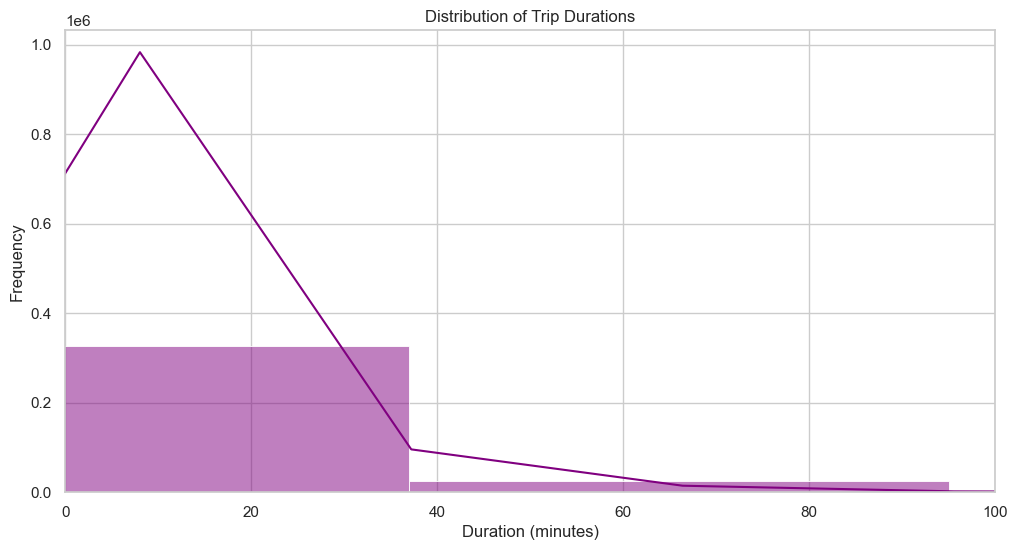

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(pandas_df['trip_duration'], bins=100, kde=True, color='purple')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3264\287791732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')


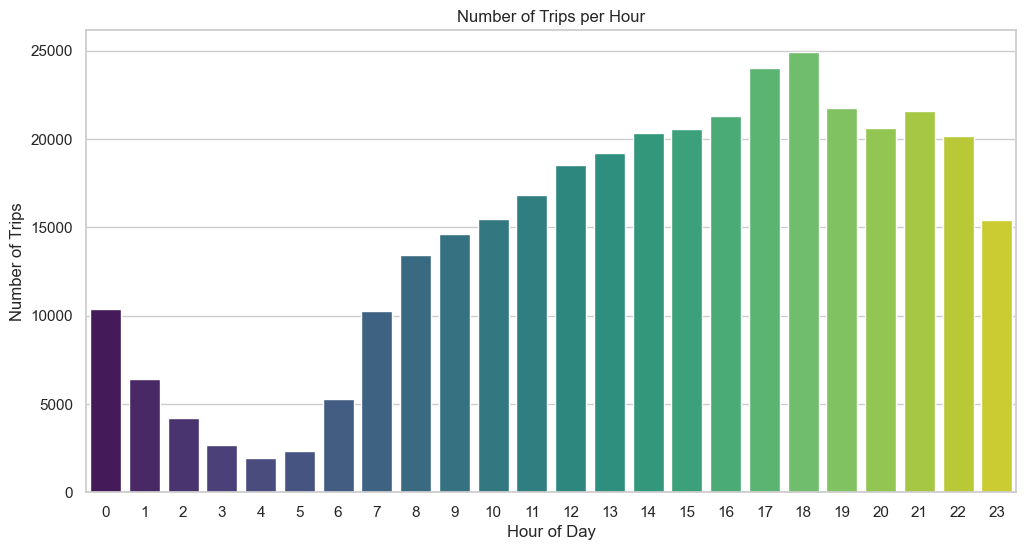

In [18]:
pandas_df['pickup_hour'] = pandas_df['tpep_pickup_datetime'].dt.hour

trips_per_hour = pandas_df.groupby('pickup_hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.show()

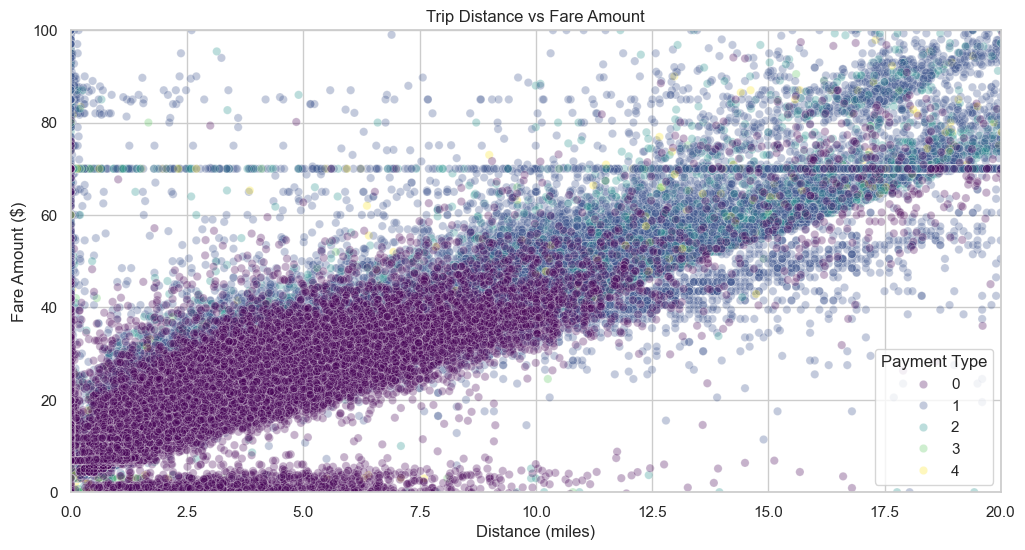

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=pandas_df, alpha=0.3, hue='payment_type', palette='viridis')
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.legend(title='Payment Type')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3264\1469802633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count', data=pandas_df, palette='pastel')


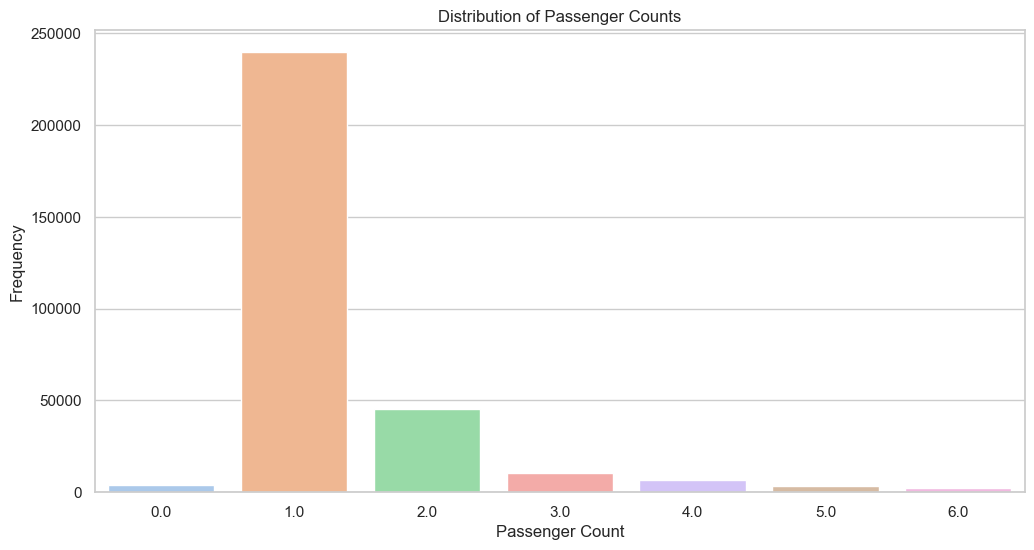

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='passenger_count', data=pandas_df, palette='pastel')
plt.title('Distribution of Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3264\2270777995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=pandas_df, palette='deep')


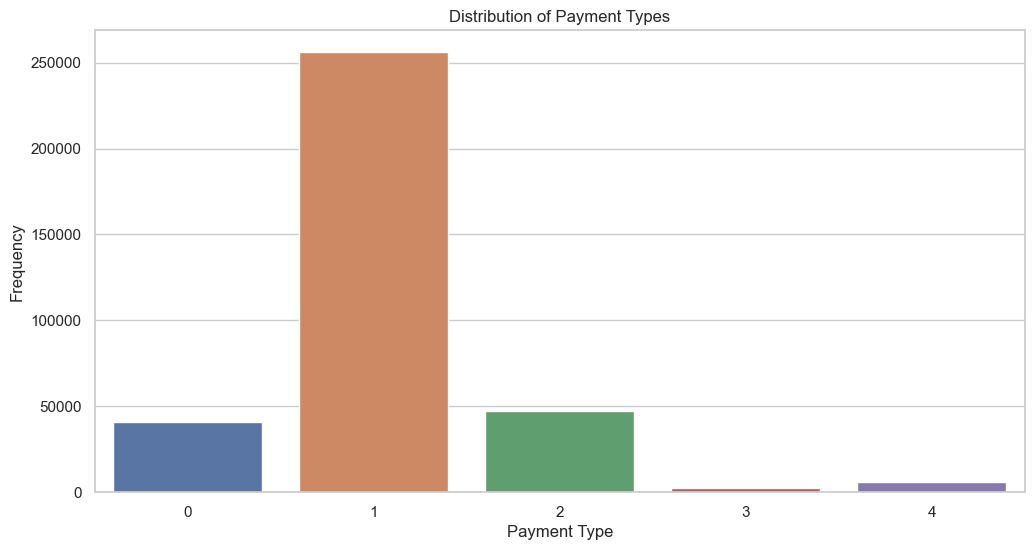

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_type', data=pandas_df, palette='deep')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()

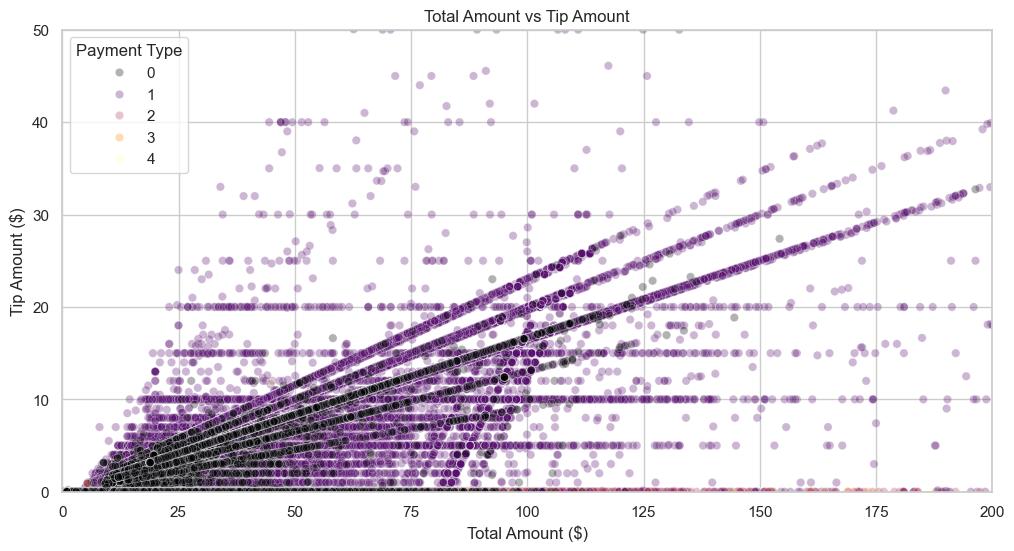

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_amount', y='tip_amount', data=pandas_df, alpha=0.3, hue='payment_type', palette='inferno')
plt.title('Total Amount vs Tip Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Tip Amount ($)')
plt.xlim(0, 200)
plt.ylim(0, 50)
plt.legend(title='Payment Type')
plt.show()
